# Sanjay Avva - Project I Part III
## Date: 10/14/25
### Answering + Graphing Viz(es)


### Importing Pandas Library for Data Processing, Matplotlib For Data VIsualization

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

### Reading Data From Local Folder into Dataframe (Relative Path):

In [36]:
df = pd.read_csv("cleaned.csv")
df.shape

(92, 28)

In [ ]:
df.head() #testing to see if it displays as intended

### Questions from P1:
1) What are the top reasons for non-major students to attend CCM's I.T. department? (did not answer)
2) Did more students join the I.T. department out of personal growth or financial interests?
3) What are the most popular events that students attended prior to starting at CCM?
4) Did students in the age range of 19-20 hear about CCM at all through older media outlets? (Radio & Television)
5) Which additional computing class had the most strongly interested students? (Yes vs No rate)


### Citations:
- https://matplotlib.org/stable/gallery/color/named_colors.html | Active color descriptor strings
- https://matplotlib.org/stable/ | Matplotlib docs used for misc plt arguments/operations
- Intro to Python for Computer Science and Data Science - PAUL DEITEL HARVEY DEITEL | Textbook
- https://www.youtube.com/watch?v=Zs-Rbkr9LVI | Used to choose viz colors
- https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html | Matplotlib Patches for custom legend

### Answering Question II: Did more students join the I.T. department out of personal development or financial interests?

#### Used Bar-Chart to indicate difference in quantity



In [38]:
sum_reasonpd = df["motivation_personal"].sum() #calculate variable sums of column sides
sum_reasonfinance = df['motivation_financial'].sum()

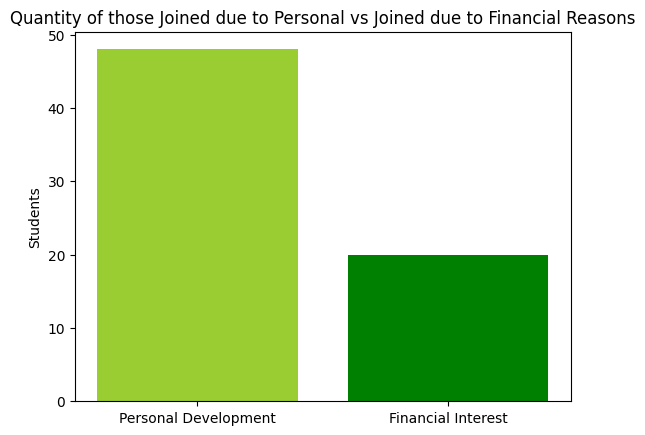

In [39]:
plt.bar(['Personal Development', 'Financial Interest'], [sum_reasonpd, sum_reasonfinance], color=['yellowgreen', 'green']) #Create bar chart, used diferent shades of green to show dif in growth types
plt.title(f"Quantity of those Joined due to Personal vs Joined due to Financial Reasons")
plt.ylabel("Students")
plt.show()

### Verdict Q2: Personal Development was more often a factor for students to join CCM than Financial Interest

### Answering Question III: What are the most popular physical events that students attended prior to starting at CCM (college fair, open house, information-session, Women Who Dare)?

#### Used Bar-Chart to indicate difference in quantity

In [40]:
event_cols = [c for c in df.columns if c.startswith("event_")] #list comp of columns that start with event

In [41]:
event_counts = df[event_cols].sum().sort_values(ascending=False) #sorts thru each of columns in event_cols, orders by descending sums of each columns (0 or 1 values)

In [42]:
event_counts.head()

,0
event_openhouse,23
event_on-campus-infosession,19
event_collegefair,5
event_women-who-dare,0


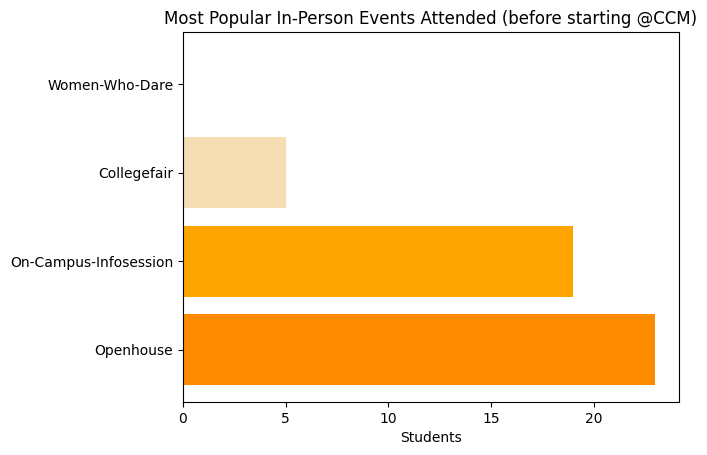

In [43]:
plt.barh(
    event_counts.index.str.replace("event_", "").str.replace("_", " ").str.title(),
    event_counts.values,
    color=["darkorange","orange", "wheat"] #Used orange to symbolize interactivity of college fairs, gradiented alterations to emphazie freq
)

plt.xlabel("Students")
plt.title("Most Popular In-Person Events Attended (before starting @CCM)")
plt.show()

# print(event_counts)


### Verdict Q3: The Open House was the most popular pre-CCM physical event

### Answering Question IV: Did students in the age range of 19-20 hear about CCM at all through older media outlets? (Radio & Television)

#### Answered direct question in console + used pi chart to support proportion to a whole

In [44]:
nineteen_and_twenty = df[df['age'] == "19-20"] #filter students tagged 19-20 in age col

In [ ]:
nineteen_and_twenty.head()

In [46]:
heard = nineteen_and_twenty[
    (nineteen_and_twenty['hear_tv'] == 1) | (nineteen_and_twenty['hear_radio'] == 1) #conditional selector that keeps students who heard at least one of older media
]


count_heard = len(heard) #compute number of students in selector
count_not_heard = len(nineteen_and_twenty) - count_heard #number of students who did not listen to either forms of old media to hear about CCM

proportions = [count_heard, count_not_heard] #organizes data for pi chart
labels = ["Heard via TV/Radio", "Did Not Hear via Older Media"]

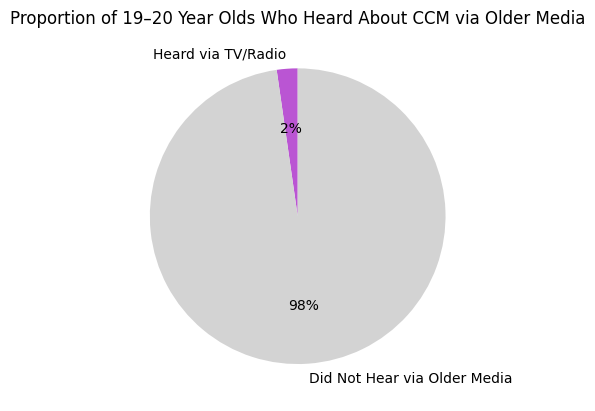

At least one student in the 19-20 age band listened to a form of old media to hear about ccm [see pi chart for proportion]


In [47]:
plt.pie( #create pi chart
    proportions,
    labels=labels,
    autopct='%.0f%%', #round to 2 decimals
    colors=['mediumorchid', 'lightgray'], #styling
    startangle=90
)
plt.title("Proportion of 19–20 Year Olds Who Heard About CCM via Older Media")
plt.show()

if(count_heard!=0): #console answer
  print("At least one student in the 19-20 age band listened to a form of old media to hear about ccm [see pi chart for proportion]")
else:
  print("No student in the 19-20 age band listened to a form of old media to hear about ccm")

### Verdict Q4: At least one student in the age range of 19-20 heard about CCM through older media (Radio/TV), however that proportion was minescule with only a single student aged 19-20 in the response pool answering positive

### Answering Question V: Which additional computing class had the most strongly interested students? (Yes vs No rate)


In [48]:
interest_cols = [c for c in df.columns if c.startswith("interest_")] #list comp of columns that start with interest

In [49]:
interest_counts = df[interest_cols].sum().sort_values(ascending=True) #creates a new series that carries ascending sums of yes (values of '1') values correlating to interest;

In [53]:
interest_counts

,0
interest_data,21
interest_webdev,22
interest_programming,22
interest_hardware&repair,22
interest_appdev,24
interest_gamedesign,28
interest_ai,28
interest_cyber,31


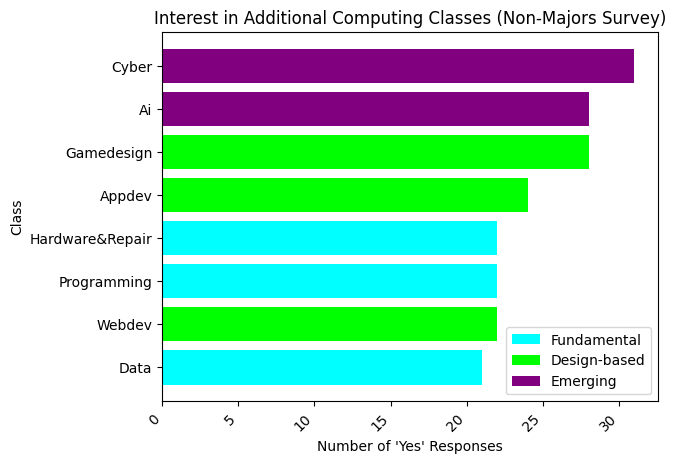

In [54]:
#creates bar chart of ascending interest in classes with distinct coloring
plt.barh(interest_counts.index.str.replace("interest_", "").str.title(), interest_counts.values, color=["aqua","lime","aqua","aqua","lime","lime","purple","purple"]) #styling x-axis labels and applying data+colors
plt.xticks(rotation=45, ha='right') #rotation 45 beacause x_axis titles would overlap
plt.title("Interest in Additional Computing Classes (Non-Majors Survey)")
plt.xlabel("Number of 'Yes' Responses")
plt.ylabel("Class")

legend_handles = [
    Patch(facecolor='aqua', label='Fundamental'),
    Patch(facecolor='lime', label='Design-based'),
    Patch(facecolor='purple', label='Emerging')
]


plt.legend(handles=legend_handles, loc='lower right')
plt.show()

### Verdict Q5: Cybersecurity classes had the most student interest overall